<a href="https://colab.research.google.com/github/laurabersani/MLPNS_LBersani/blob/main/Convlutional_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib as mpl
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [4]:
cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [5]:
#NOTA IMPORTANTE: si può fare load solo perchè precedentemente scaricate le immagini dal notebook https://github.com/laurabersani/MLPNS_LBersani/blob/main/generativeAI/superresolve_aenc_faces.ipynb
imgs = np.load("data/faces_saved.npy")
imgs.shape
#Osservo che la dimensione è già corretta

(1441, 70, 70, 1)

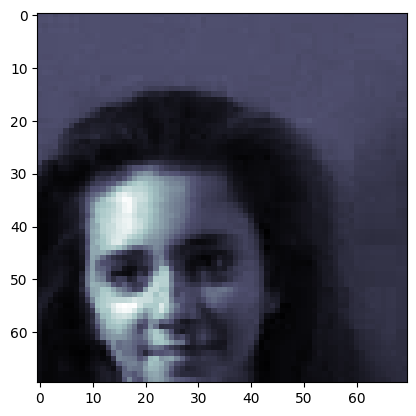

In [11]:
pl.imshow(imgs[10,:,:,0], cmap='bone')

##Costruzione del modello
- Convlutional 64 neuroni (immagine 70x70), con mappa 5x5
- Pooling (con mappa 2x2)
- Layer Conv 32 neuroni 
- Pooling
- Layer Conv 16 neuroni
- Pooling
- Layer conv 32
- pool
- Layer conv 64

In [6]:
layer64 = keras.layers.Conv2D(64, #n di neuroni
                             kernel_size=(5, 5), #dim della mappa di convoluzione 
                             padding="same", 
                             activation="relu", 
                             input_shape=(70, 70, 1), #needed in the first layer only
                             kernel_regularizer=keras.regularizers.l2(0.001))

layermp = keras.layers.MaxPool2D(2)

layer32 = keras.layers.Conv2D(32, 
                             kernel_size=(5, 5),
                             padding="same", 
                             activation="relu", 
                             kernel_regularizer=keras.regularizers.l2(0.001))

#layer4 = keras.layers.MaxPool2D(2)

layer16 = keras.layers.Conv2D(16, 
                             kernel_size=(5, 5),
                             padding="same", 
                             activation="relu", 
                             kernel_regularizer=keras.regularizers.l2(0.001))

#layer7 = keras.layers.MaxPool2D(2)
layer5=keras.layers.Flatten()

layer6 = keras.layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))



layer7 = keras.layers.Dense(64, activation="softmax")

layer8 = keras.layers.Dense(70*70, activation='sigmoid')

layers=[layer64, layermp, layer32, layermp, layer16, layer5, layer6, layer7, layer8]

model = keras.Sequential(layers)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 32)        51232     
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 16)        12816     
                                                                 
 flatten (Flatten)           (None, 4624)              0         
                                                                 
 dense (Dense)               (None, 32)                148000    
                                                        

In [14]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(imgs, imgs, test_size = .20, random_state=1)

In [15]:
#L'output sarà un array, quindi devo appiattire le immagini di output
Ytrain = Ytrain.reshape(len(Ytrain), np.prod(Ytrain.shape[1:]))
Ytest = Ytest.reshape(len(Ytest), np.prod(Ytest.shape[1:]))

In [ ]:
Ytrain.shape, Ytest.shape

((1152, 4900), (289, 4900))

In [ ]:
model.compile(optimizer='adamax', loss='mse',
              metrics=['mae', 'acc'])

In [ ]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_mae',
                         patience=10,
                         min_delta=0.0001)

In [ ]:
history = model.fit( Xtrain, Ytrain, epochs=100000, 
                    validation_data=[Xtest, Ytest],
                    batch_size=16, verbose=1,
                    callbacks=[callback])

Epoch 1/100000
 4/72 [>.............................] - ETA: 22s - loss: 0.0311 - mae: 0.1327 - acc: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
model.save("data/convlutional32_16_8.h5")

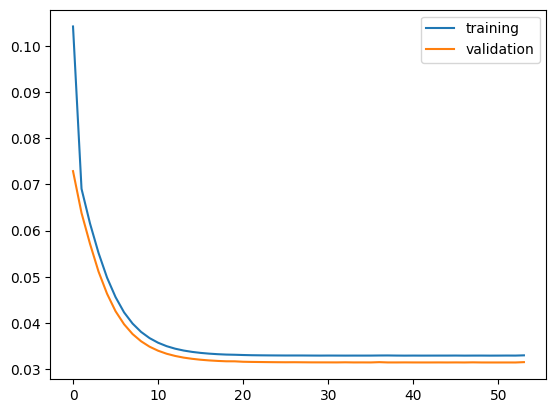

In [ ]:
pl.plot(np.array(history.history['loss']), label="training")
pl.plot(np.array(history.history['val_loss']), label="validation")
pl.legend()

è molto liscia. Il che è un bene perchè vuol dire che il learning rate è adeguato, ma anche un male perchè vuol dire che abbiamo spazio per imparare. 

In [ ]:
imgsout=model.predict(Xtest)

10/10 [==============================] - 3s 244ms/step


In [ ]:
imgsout.shape

(289, 4900)

In [ ]:
imgs_o=imgsout.reshape(imgsout.shape[0],70,70)

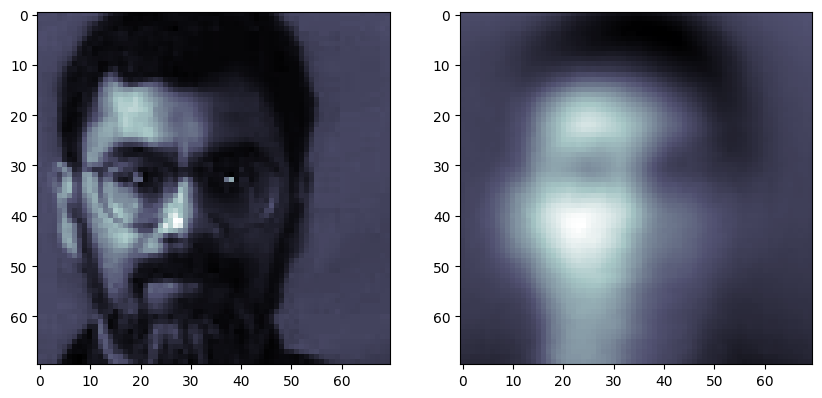

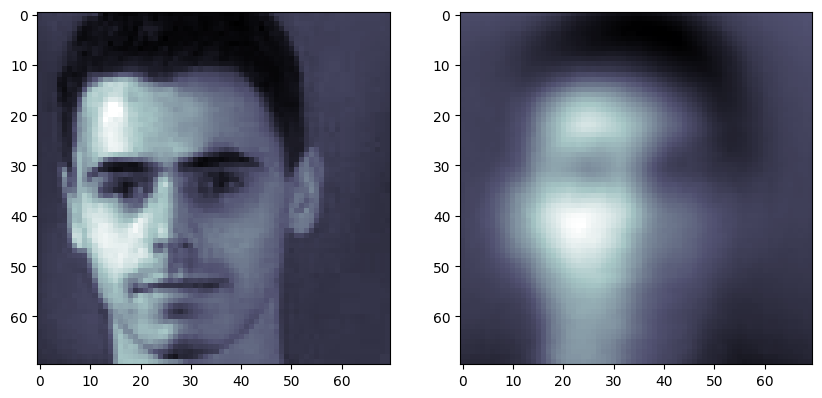

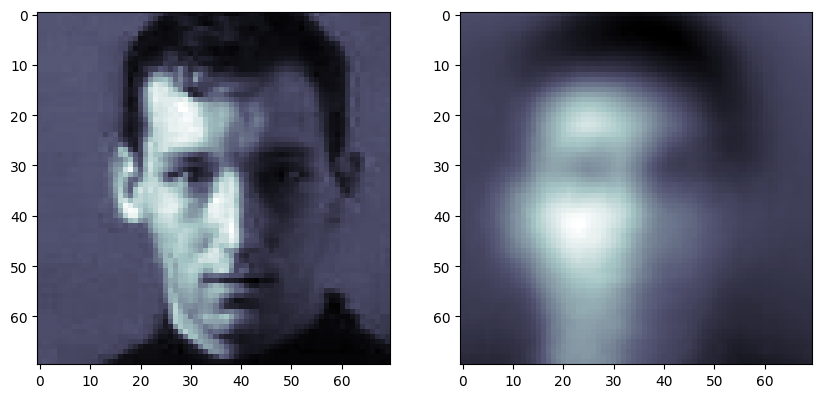

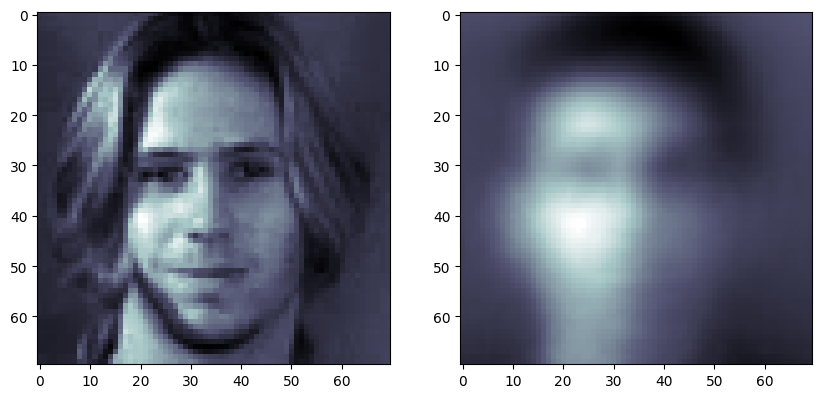

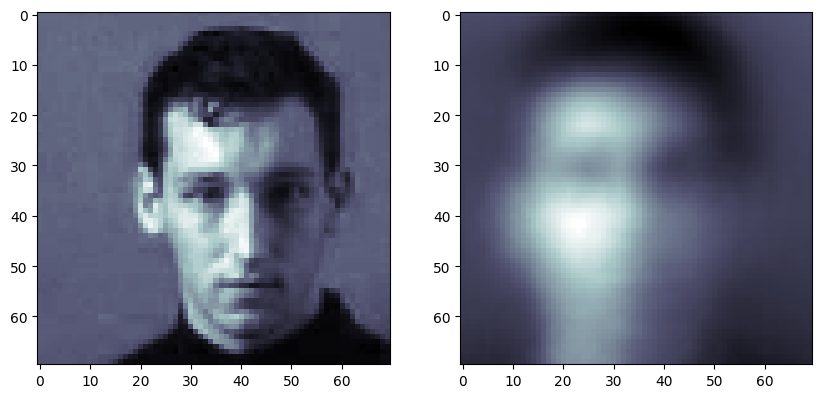

In [ ]:
for i in [0, 5, 10, 15,20]:

  fig=pl.figure(figsize=(10,5))
  ax1=fig.add_subplot(121)
  ax1.imshow(Xtest[i, :,:], cmap='bone')
  ax2=fig.add_subplot(122)
  ax2.imshow(imgs_o[i,:,:], cmap='bone')

Sono venuti tutti uguali! Ad un qualcosa di fumoso che è il valore medio. 
Proviamo a cambiare il learning rate. 

Oppure posso pravare a fare una rete un po' più complessa. 

256-->128-->64-->128-->256

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [26]:
model2 = keras.Sequential()
model2.add(Conv2D(128, kernel_size=(5, 5), 
                  padding="same", activation="relu", 
                  input_shape=(70, 70, 1),
                  kernel_regularizer=keras.regularizers.l2(0.001) ))
model2.add(MaxPooling2D(2))
model2.add(Conv2D(64, kernel_size=(5, 5), 
                  padding="same", activation="relu", 
                  input_shape=(70, 70, 1),
                  kernel_regularizer=keras.regularizers.l2(0.001) ))
model2.add(MaxPooling2D(2))
model2.add(Conv2D(32, kernel_size=(5, 5), 
                  padding="same", activation="relu", name="bottleneck",
                  input_shape=(70, 70, 1),
                  kernel_regularizer=keras.regularizers.l2(0.001) ))
model2.add(Flatten())
model2.add(Dense(64, activation='relu' ))
model2.add(Dense(128, activation='softmax'))
model2.add(Dense(70*70, activation='sigmoid'))

In [27]:
model2.compile(optimizer='adamax', loss='mse',
              metrics=['mae', 'acc'])

In [28]:
history2 = model2.fit( Xtrain, Ytrain, epochs=100000, 
                    validation_data=[Xtest, Ytest],
                    batch_size=16, verbose=1,
                    callbacks=[callback])

Epoch 1/100000
72/72 [==============================] - 4s 18ms/step - loss: 0.1011 - mae: 0.2476 - acc: 0.0035 - val_loss: 0.0725 - val_mae: 0.2377 - val_acc: 0.0000e+00
Epoch 2/100000
72/72 [==============================] - 1s 12ms/step - loss: 0.0692 - mae: 0.2316 - acc: 0.0017 - val_loss: 0.0641 - val_mae: 0.2220 - val_acc: 0.0069
Epoch 3/100000
72/72 [==============================] - 1s 13ms/step - loss: 0.0616 - mae: 0.2164 - acc: 8.6806e-04 - val_loss: 0.0569 - val_mae: 0.2068 - val_acc: 0.0069
Epoch 4/100000
72/72 [==============================] - 1s 13ms/step - loss: 0.0551 - mae: 0.2024 - acc: 8.6806e-04 - val_loss: 0.0511 - val_mae: 0.1934 - val_acc: 0.0069
Epoch 5/100000
72/72 [==============================] - 1s 12ms/step - loss: 0.0500 - mae: 0.1905 - acc: 8.6806e-04 - val_loss: 0.0466 - val_mae: 0.1820 - val_acc: 0.0069
Epoch 6/100000
72/72 [==============================] - 1s 12ms/step - loss: 0.0460 - mae: 0.1803 - acc: 8.6806e-04 - val_loss: 0.0430 - val_mae: 0.1

In [29]:
model2.save("data/convlutional64_32_16.h5")

In [30]:
outim2flat=model2.predict(Xtest)

10/10 [==============================] - 0s 4ms/step


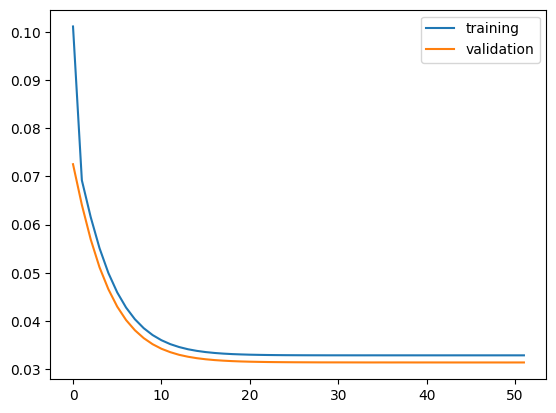

In [31]:
pl.plot(np.array(history2.history['loss']), label="training")
pl.plot(np.array(history2.history['val_loss']), label="validation")
pl.legend()

Sempre molto liscia... 

In [32]:
Outim2flat=model2.predict(Xtest)

10/10 [==============================] - 0s 5ms/step


In [33]:
Outim=Outim2flat.reshape(Outim2flat.shape[0],70, 70)

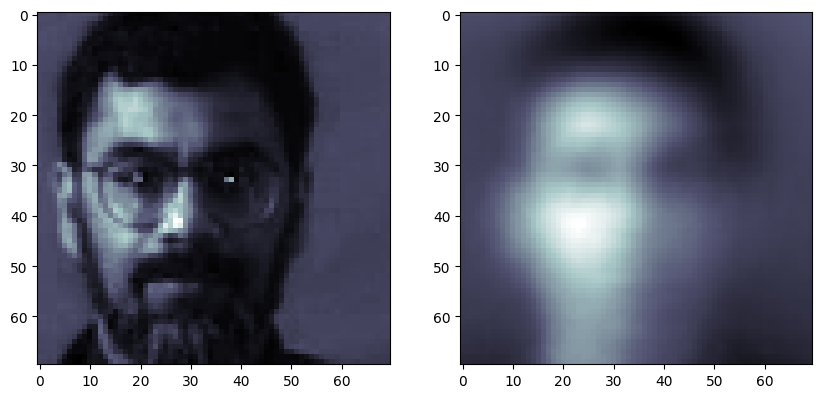

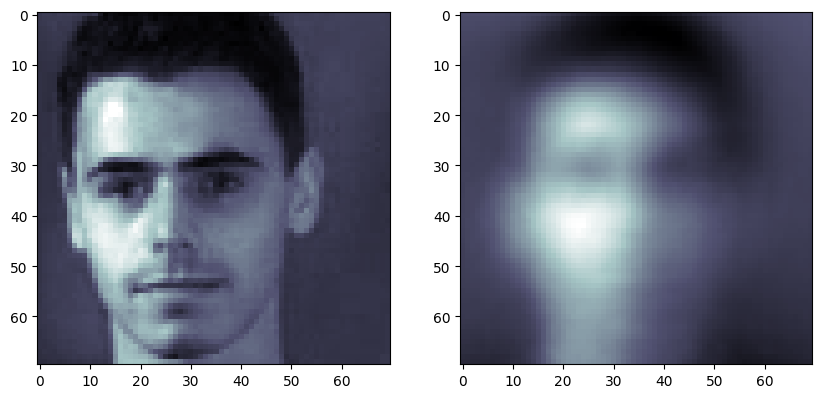

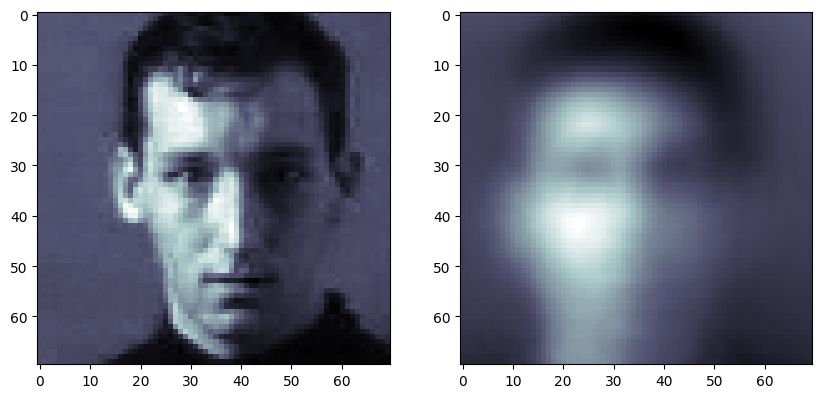

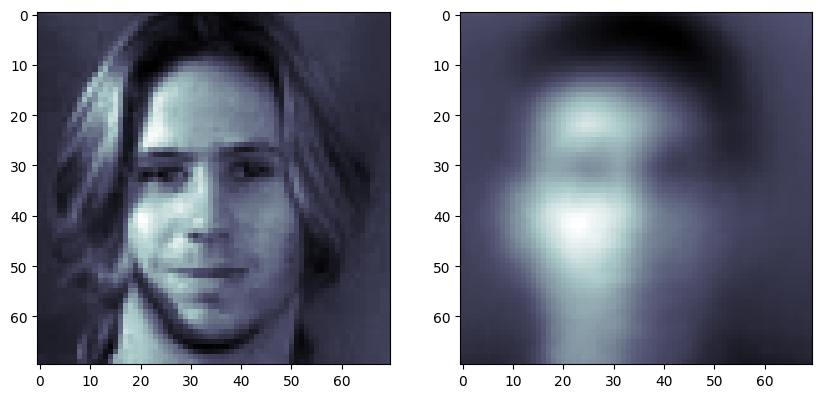

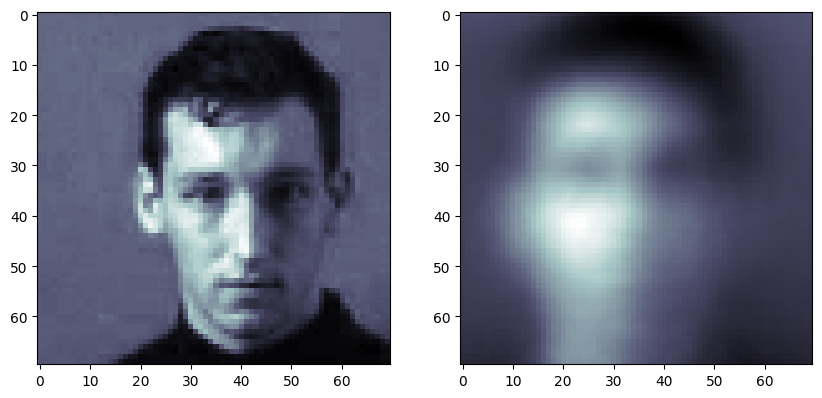

In [35]:
for i in [0, 5, 10, 15,20]:

  fig=pl.figure(figsize=(10,5))
  ax1=fig.add_subplot(121)
  ax1.imshow(Xtest[i, :,:], cmap='bone')
  ax2=fig.add_subplot(122)
  ax2.imshow(Outim[i,:,:], cmap='bone')

Non sembra che con più neuroni si sia risolto il problema. Proviamo ad abbassare il learning rate. 

(Usiamo il primo modello che era più rapido)

In [37]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_mae',
                         patience=10,
                         min_delta=0.0001)

In [44]:
from keras import optimizers
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', metrics=['mae', 'acc'], optimizer=opt)
history_op = model.fit( Xtrain, Ytrain, epochs=100, 
                    validation_data=[Xtest, Ytest],
                    batch_size=16, verbose=1,
                    callbacks=[callback])

Epoch 1/100
72/72 [==============================] - 3s 12ms/step - loss: 0.0330 - mae: 0.1374 - acc: 0.0026 - val_loss: 0.0314 - val_mae: 0.1338 - val_acc: 0.0000e+00
Epoch 2/100
72/72 [==============================] - 0s 7ms/step - loss: 0.0330 - mae: 0.1378 - acc: 0.0035 - val_loss: 0.0314 - val_mae: 0.1335 - val_acc: 0.0069
Epoch 3/100
72/72 [==============================] - 0s 7ms/step - loss: 0.0330 - mae: 0.1376 - acc: 0.0026 - val_loss: 0.0314 - val_mae: 0.1337 - val_acc: 0.0000e+00
Epoch 4/100
72/72 [==============================] - 1s 8ms/step - loss: 0.0330 - mae: 0.1374 - acc: 8.6806e-04 - val_loss: 0.0315 - val_mae: 0.1342 - val_acc: 0.0069
Epoch 5/100
72/72 [==============================] - 1s 8ms/step - loss: 0.0330 - mae: 0.1378 - acc: 0.0017 - val_loss: 0.0314 - val_mae: 0.1340 - val_acc: 0.0000e+00
Epoch 6/100
72/72 [==============================] - 1s 8ms/step - loss: 0.0330 - mae: 0.1375 - acc: 0.0026 - val_loss: 0.0314 - val_mae: 0.1335 - val_acc: 0.0000e+00
E

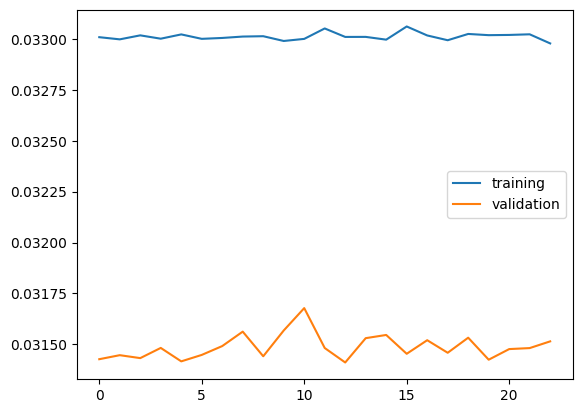

In [45]:
pl.plot(np.array(history_op.history['loss']), label="training")
pl.plot(np.array(history_op.history['val_loss']), label="validation")
pl.legend()

Ora è più rugosa... Avrà imparato di più?

In [21]:
outim_opflat=model.predict(Xtest)

10/10 [==============================] - 0s 4ms/step


In [23]:
outimop=outim_opflat.reshape(outim_opflat.shape[0],70, 70)

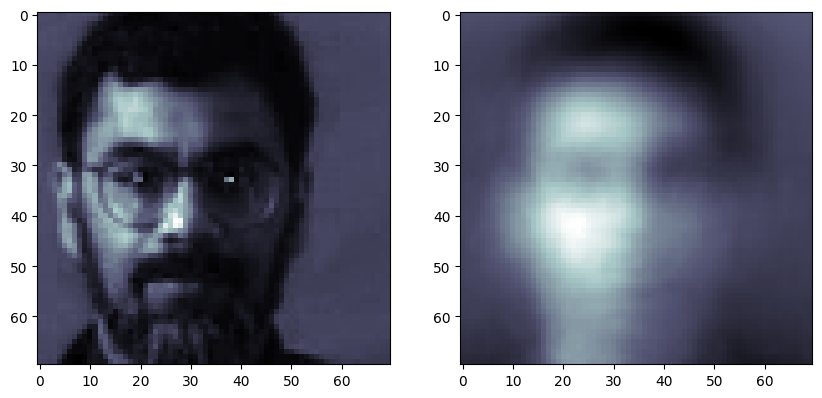

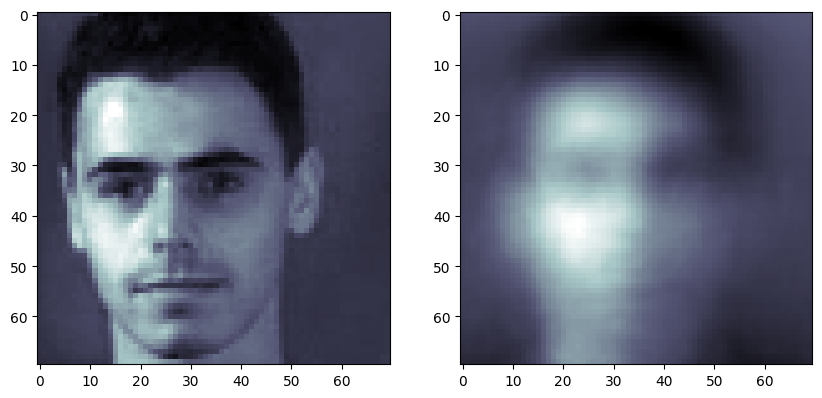

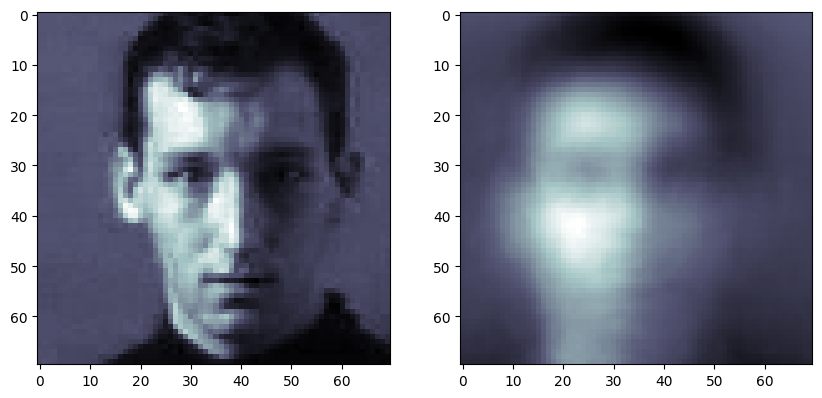

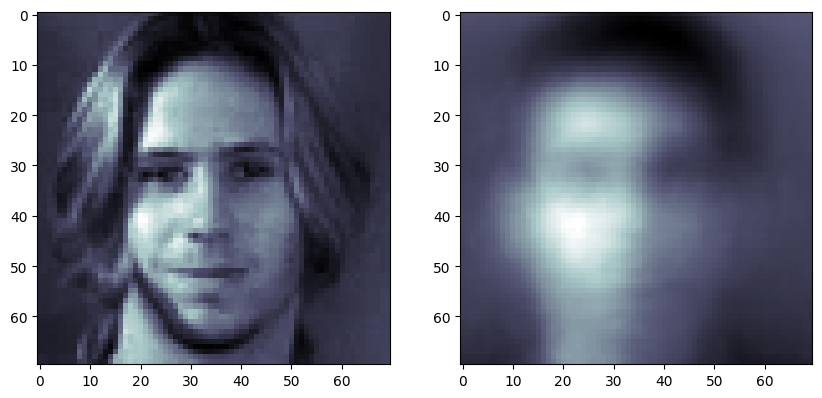

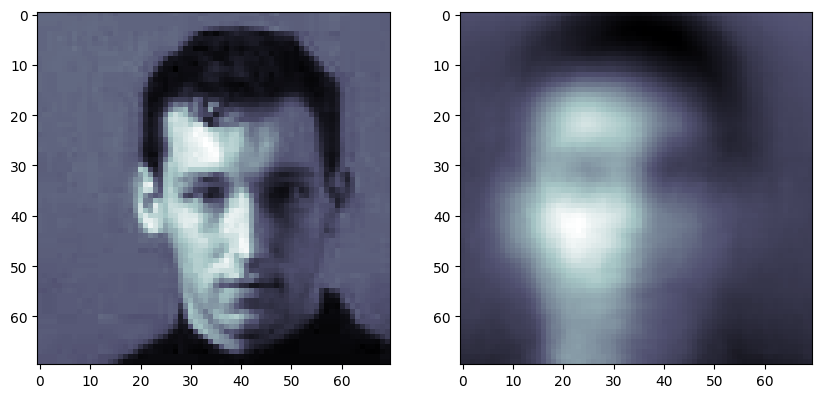

In [24]:
for i in [0, 5, 10, 15,20]:

  fig=pl.figure(figsize=(10,5))
  ax1=fig.add_subplot(121)
  ax1.imshow(Xtest[i, :,:], cmap='bone')
  ax2=fig.add_subplot(122)
  ax2.imshow(outimop[i,:,:], cmap='bone')

In [46]:
model3 = keras.Sequential()
model3.add(Conv2D(64, kernel_size=(5, 5), 
                  padding="same", activation="relu", 
                  input_shape=(70, 70, 1),
                  kernel_regularizer=keras.regularizers.l2(0.001) ))
model3.add(MaxPooling2D(2))
model3.add(Conv2D(32, kernel_size=(5, 5), 
                  padding="same", activation="relu", 
                  input_shape=(70, 70, 1),
                  kernel_regularizer=keras.regularizers.l2(0.001) ))
model3.add(MaxPooling2D(2))
model3.add(Conv2D(16, kernel_size=(5, 5), 
                  padding="same", activation="relu", name="bottleneck",
                  input_shape=(70, 70, 1),
                  kernel_regularizer=keras.regularizers.l2(0.001) ))
model3.add(Flatten())
model3.add(Dense(32, activation='relu' ))
model3.add(Dense(16, activation='sigmoid'))
model3.add(Dense(70*70, activation='sigmoid'))

In [53]:
#opt = keras.optimizers.Adam(learning_rate=0.01)
model3.compile(loss='binary_crossentropy')
history_ce = model3.fit( Xtrain, Ytrain, epochs=60, 
                    validation_data=[Xtest, Ytest],
                    batch_size=16, verbose=1)
#Non metto una comeback

Epoch 1/60
72/72 [==============================] - 4s 10ms/step - loss: 0.7314 - val_loss: 0.7084
Epoch 2/60
72/72 [==============================] - 0s 6ms/step - loss: 0.6832 - val_loss: 0.6630
Epoch 3/60
72/72 [==============================] - 0s 6ms/step - loss: 0.6501 - val_loss: 0.6384
Epoch 4/60
72/72 [==============================] - 0s 6ms/step - loss: 0.6306 - val_loss: 0.6230
Epoch 5/60
72/72 [==============================] - 0s 6ms/step - loss: 0.6182 - val_loss: 0.6129
Epoch 6/60
72/72 [==============================] - 0s 7ms/step - loss: 0.6099 - val_loss: 0.6060
Epoch 7/60
72/72 [==============================] - 1s 9ms/step - loss: 0.6041 - val_loss: 0.6012
Epoch 8/60
72/72 [==============================] - 1s 9ms/step - loss: 0.6001 - val_loss: 0.5977
Epoch 9/60
72/72 [==============================] - 1s 8ms/step - loss: 0.5972 - val_loss: 0.5952
Epoch 10/60
72/72 [==============================] - 1s 7ms/step - loss: 0.5951 - val_loss: 0.5934
Epoch 11/60
72/72 

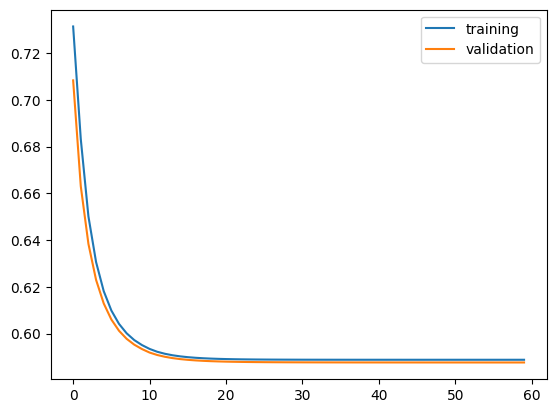

In [54]:
pl.plot(np.array(history_ce.history['loss']), label="training")
pl.plot(np.array(history_ce.history['val_loss']), label="validation")
pl.legend()

In [55]:
imgce_flat=model3.predict(Xtest)

10/10 [==============================] - 0s 4ms/step


In [56]:
imgce=imgce_flat.reshape(imgce_flat.shape[0],70,70)

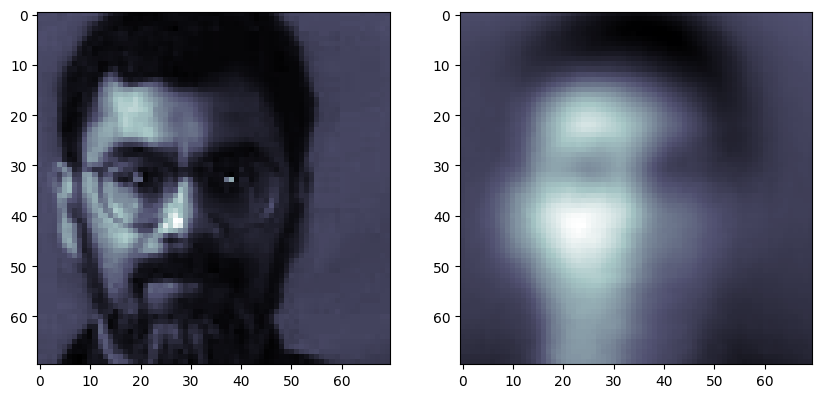

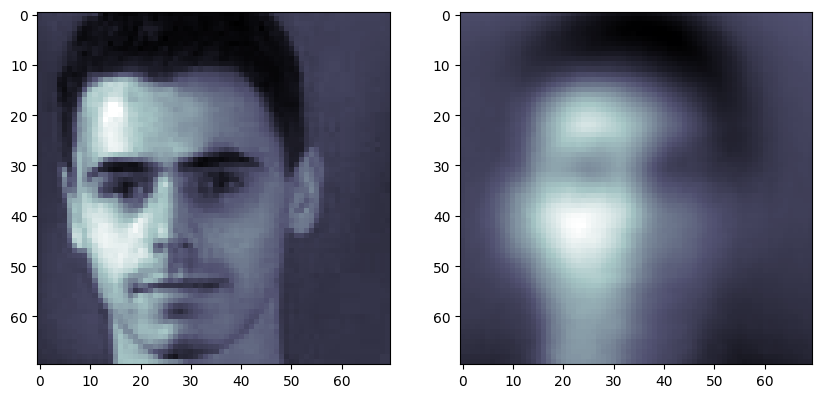

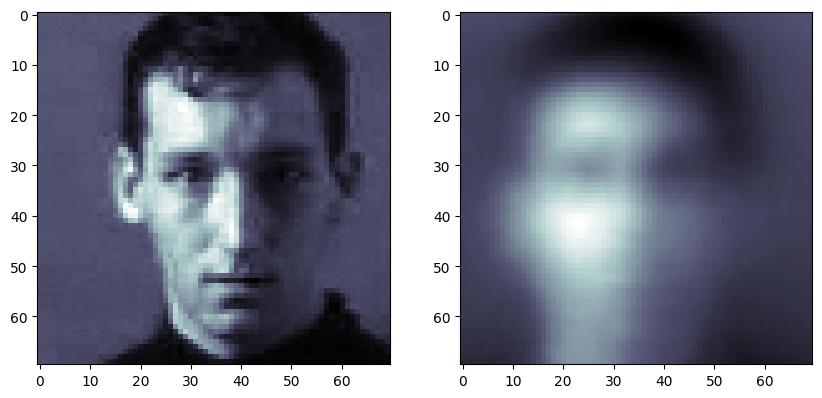

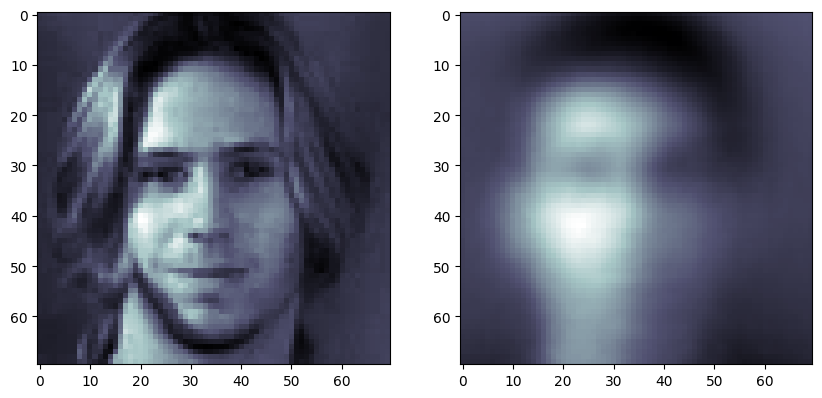

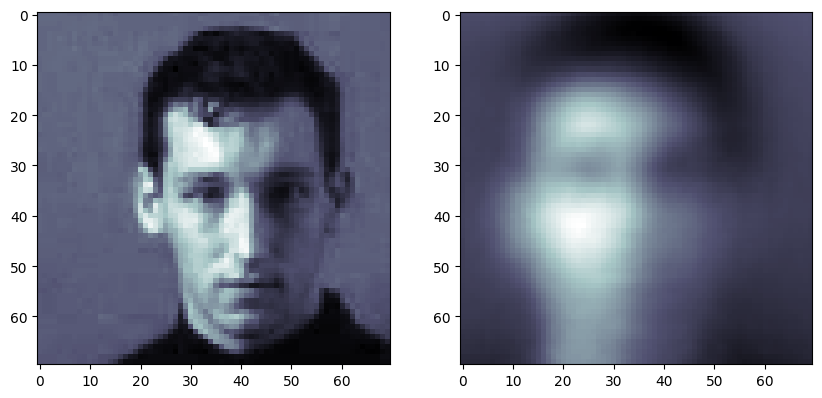

In [57]:
for i in [0, 5, 10, 15,20]:

  fig=pl.figure(figsize=(10,5))
  ax1=fig.add_subplot(121)
  ax1.imshow(Xtest[i, :,:], cmap='bone')
  ax2=fig.add_subplot(122)
  ax2.imshow(imgce[i,:,:], cmap='bone')